In [88]:
import numpy as np
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [2]:
data_path = '/Users/maxperozek/ML-CP341/6/health_tweets.txt'
with open(data_path, 'rb') as f:
    lines = f.readlines()

In [3]:
for i in range(len(lines)):
    lines[i] = str(lines[i]).strip("'").replace('\\r', '').replace('\\n', '').split('|')

In [4]:
for i in range(len(lines)):
    if len(lines[i]) >= 3:
        lines[i] = re.sub(r'[^a-zA-Z ]+', '', lines[i][2]).lower()

In [10]:
corpus = ''
for line in lines:
    corpus += str(line) + ' '

In [11]:
corpus[:1000]

'breast cancer risk test devised httpbbcincimpjf gp workload harming care  bma poll httpbbcinchtbrv short peoples heart risk greater httpbbcinchtanp new approach against hiv promising httpbbcinejajt coalition undermined nhs  doctors httpbbcincnlwk review of case against nhs manager httpbbcinffjci video all day is empty what am i going to do httpbbcinnwssz video overhaul needed for endoflife care httpbbcincmrru care for dying needs overhaul httpbbcinfdsgrl video nhs labour and tory key policies httpbbcincieqd have gp services got worse httpbbcincic aampe waiting hits new worst level httpbbcinfaxgz parties row over gp opening hours httpbbcincfcvob why strenuous runs may not be so bad after all httpbbcinceqy video health surcharge for noneu patients httpbbcincmlbk video skin cancer spike from s holidays httpbbcincgyo  might die in future outbreak httpbbcinfnif skin cancer linked to holiday boom httpbbcinpbxjb public back tax rises to fund nhs httpbbcinetauye video welcome to the designer 

In [12]:
stopword_path = '/Users/maxperozek/ML-CP341/6/stopwords.txt'
stopwords = np.loadtxt(stopword_path, dtype=str)

In [13]:
stopwords

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
       'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself',
       'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
       'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',
       'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 

In [66]:
def get_freqs(corpus):
    word_list = corpus.split(' ')
    word_list = np.unique(np.array(word_list, dtype=str))
    
    freq_dict = {}
    pbar = tqdm(total=word_list.shape[0] , position=0, leave=True)
    for i in range(word_list.shape[0]):
        freq_dict[word_list[i]] = corpus.count(word_list[i])
        pbar.update(1)
    return freq_dict
        

In [123]:
# unique list of words with:
# stopwords removed

def get_wordlist(corpus, stopwords, freq_dict, min_freq, max_freq):
    word_list = corpus.split(' ')
    word_list = np.unique(np.array(word_list, dtype=str))
    
    remove = []
    for i in range(word_list.shape[0]):
        if str(word_list[i]) in stopwords:
            remove.append(i)
        elif freq_dict[word_list[i]] >= max_freq or freq_dict[word_list[i]] <= min_freq:
            remove.append(i)
                    
    mask = np.ones(len(word_list), dtype=bool)
    mask[remove] = False

    return remove, word_list[mask]

In [68]:
word_freqs = get_freqs(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████| 90126/90126 [03:33<00:00, 422.69it/s]


In [82]:
counts = np.array(list(word_freqs.values()))

In [83]:
counts.mean()

166.30000221911547

In [84]:
counts.std()

18828.150727802386

In [98]:
hist_vals = np.histogram(counts, bins=[1,10,20,30,40,50,100])

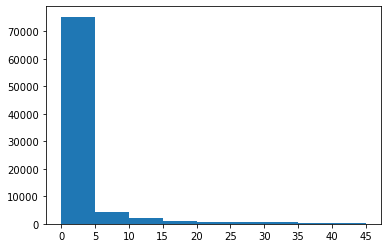

In [119]:
bins = np.arange(0,50,5)
plt.hist(counts, bins=bins)
plt.xticks(bins)
plt.show()

In [132]:
remove_no_max, word_list_no_max = get_wordlist(corpus, stopwords ,freq_dict=word_freqs, min_freq=7, max_freq=np.inf)

In [159]:
# between 5 and 20 occurences seems to be a threshold where words become very obscure / unhelpful but I will play around with this number
# Upper threshold is mean + 1 std deviation this is only taking out <100 words and none of them appear to be useful
# see: 'high_freq_words' below
remove, word_list = get_wordlist(corpus, stopwords ,freq_dict=word_freqs, min_freq=15, max_freq=counts.mean() + counts.std())

In [160]:
word_list_no_max.shape

(11492,)

In [161]:
word_list.shape

(7989,)

In [162]:
# take a peek at the words that are still included
word_list[:1000]

array(['aa', 'aaa', 'aahmazing', 'aampe', 'aande', 'aandecrisis', 'aap',
       'ab', 'abandon', 'abbv', 'abbvie', 'abc', 'abilities', 'ability',
       'able', 'aboriginal', 'abort', 'abortion', 'abortions', 'abroad',
       'abs', 'absolute', 'absolutely', 'abt', 'abu', 'abuse', 'abx',
       'aby', 'ac', 'aca', 'acad', 'academic', 'acas', 'acc', 'accept',
       'acceptable', 'access', 'accident', 'accidental', 'accidents',
       'accord', 'according', 'account', 'accounts', 'accurate', 'accuse',
       'accused', 'ace', 'acetaminophen', 'ache', 'aches', 'achieve',
       'aching', 'acid', 'ack', 'ackman', 'acl', 'acne', 'aco', 'acos',
       'across', 'act', 'actavis', 'acting', 'action', 'actions',
       'active', 'activist', 'activists', 'activities', 'activity',
       'actor', 'actors', 'acts', 'actual', 'actually', 'acupuncture',
       'acute', 'acx', 'ad', 'ada', 'adam', 'adapt', 'aday', 'add',
       'added', 'addict', 'addicted', 'addiction', 'addicts', 'adding',
       

In [142]:
high_freq_words = [w for w in word_list_no_max if w not in word_list]

In [144]:
# one of these is the empty string so definitely good to get that one out of the list
high_freq_words

['',
 'al',
 'b',
 'c',
 'ca',
 'co',
 'd',
 'e',
 'ed',
 'en',
 'er',
 'es',
 'f',
 'g',
 'h',
 'ha',
 'ht',
 'http',
 'ing',
 'j',
 'k',
 'l',
 'la',
 'le',
 'm',
 'ma',
 'n',
 'nd',
 'ne',
 'o',
 'om',
 'p',
 'pr',
 'r',
 're',
 'ri',
 'rs',
 'rt',
 'se',
 'st',
 'th',
 'tr',
 'u',
 'ur',
 'v',
 've',
 'w',
 'x',
 'y']

In [163]:
def build_idf_dict(word_list, documents):
    total_docs = len(documents)
    idf_dict = {}
    
    for w in word_list:
        
        docs_with_w = 0
        for doc in documents:
            if w in doc:
                docs_with_w += 1
        idf_dict[w] = np.log((total_docs/docs_with_w))
            
    
    return idf_dict

In [164]:
idf_dict = build_idf_dict(word_list, lines)

In [166]:
# take a peek
idf_dict

{'aa': 3.528779555496092,
 'aaa': 5.896980175655347,
 'aahmazing': 7.590299572070149,
 'aampe': 5.579571922938365,
 'aande': 7.012984207035326,
 'aandecrisis': 7.87798164452193,
 'aap': 6.945161610696565,
 'ab': 1.9812857572000415,
 'abandon': 8.165663716973711,
 'abbv': 6.699326648180285,
 'abbvie': 6.961690912647775,
 'abc': 6.460915624735286,
 'abilities': 7.249372985099556,
 'ability': 6.038755638054951,
 'able': 4.165426354722709,
 'aboriginal': 7.559527913403396,
 'abort': 5.491515067547183,
 'abortion': 5.510858030390313,
 'abortions': 7.41844931514349,
 'abroad': 8.011513037146454,
 'abs': 5.542606728704894,
 'absolute': 7.920541258940727,
 'absolutely': 8.165663716973711,
 'abt': 6.5786986603916695,
 'abu': 5.313032287060394,
 'abuse': 5.950090000969295,
 'abx': 6.661586320197437,
 'aby': 4.728098691140681,
 'ac': 1.633248561127819,
 'aca': 3.8668677364495534,
 'acad': 7.030683784134727,
 'academic': 8.22282213081366,
 'acas': 7.445117562225652,
 'acc': 3.5903801647358193,
 'a

In [170]:
def build_tf_idf(word_list, documents, idf_dict):
    N = len(documents)
    f = len(word_list)
    
    X = np.zeros((N,f))
    
    pbar = tqdm(total=N*f , position=0, leave=True)
    for i in range(N):
        
        for j in range(f):
            tf = documents[i].count(word_list[j])
            X[i,j] = tf * idf_dict[word_list[j]]
            pbar.update(1)
    
    pbar.close()
    return X
    

In [171]:
X = build_tf_idf(word_list, lines, idf_dict)

In [175]:
import torch
from scipy import sparse

In [176]:
sX = sparse.csr_matrix(X)

In [177]:
torch.save(sX, 'tf_idf_mat_sparse.pt')

In [178]:
sX.shape

(63325, 7989)

In [179]:
sX[0,:]

<1x7989 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

### K means

In [180]:
from sklearn.cluster import KMeans

In [181]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(sX)

In [184]:
labs = np.unique(kmeans.labels_)

In [201]:
kmeans.labels_.shape

(63325,)

In [209]:
grp_idxs = []

for l in labs:
    grp_idxs.append(np.where(kmeans.labels_ == l)[0])

In [211]:
for grp in grp_idxs:
    print(grp.shape)

(51182,)
(3357,)
(201,)
(2350,)
(6235,)


In [212]:
documents = np.array(lines)

/var/folders/ms/mpc19fxd7zz_dr0tr65kskdh0000gn/T/ipykernel_24636/2986216089.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  documents = np.array(lines)


In [213]:
documents.shape

(63325,)

In [1]:
documents[grp_idxs[0]][10:120]

NameError: name 'documents' is not defined

In [220]:
documents[grp_idxs[1]][:10]

array(['whatxexxs at stake as health law lands at supreme court again great piece sarahvarney khnews newshour httpbitlyedzbom',
       'how catholic health insurance companies provide birthcontrol httpcnnitpkqjkn via khnews',
       'faq what yesterdays obamacare rulings mean to you httpcnnittzrsb via khnews',
       'rt kaiserfamfound use our calculator to estimate health insurance subsidies and premiums in obamacare marketplace httpowlyqgffa',
       'gay community coming out to enroll in obamacare httpwwwcnncomhealthobamacarelgbtpush outenroll glaad lgbt ncod',
       'obamacare enrollment suffers from technical glitches httpmoneycnncomnewseconomyobamacareexchangesindexhtml via cnnmoney getcovered',
       'obamacare  if you plan to shop in the marketplaces heres everything you need to know httpwwwcnncomhealthobamacareopenenrollmentindexhtml',
       'tougher vaccine law in calif clears first hurdle httpkhnewsgqddro httppbstwimgcommediacclwazbueaamvjhjpg',
       'a new sort of extr

In [221]:
documents[grp_idxs[2]][:10]

array(['rt pharmalot pharmalot pharmalittle good morning headlines coffee amp holidays httpblogswsjcompharmalothappyholidaysfrompharmalotandthepharmalittles pharma cvd aegr bmy llyx',
       'rt pharmalot the hepatitis c price war begins what the express scripts move means httpblogswsjcompharmalotthehepatitiscpricewarsbeginwhattheexpressscriptsmovemeans pharma gild abbv esrx hex',
       'rt pharmalot pharmalot pharmalittle good morning lots of headlines for a holiday week httpblogswsjcompharmalotpharmalotpharmalittlewerereadingaboutabbviegileadandmuchmore pharma gild abbv x',
       'rt pharmalot up and down the ladder job changes the latest comings amp goings recognize anyone httpblogswsjcompharmalotupanddowntheladderthelatestcomingsandgoingsatgilead pharma gild x',
       'rt pharmalot pharmalot pharmalittle as the weekend nears headlines amp holiday daydreams httpblogswsjcompharmalotpharmalotpharmalittleastheweekendnearswerereadingaboutrochefdadronesandlotsmore pharma alzheimerx',


In [222]:
documents[grp_idxs[3]][:10]

array(['sabra hummus recalled in us httpwwwcbccanewshealthsabrahummusrecalledinuscmprss',
       'us sperm bank sued by canadian couple didnt verify donor info executive says httpwwwcbccanewscanadatorontospermbanksuedbyporthopecouplesaysitdidntverifydonorinfocmprss',
       'manitoba pharmacists want clampdown on tylenol  sales httpwwwcbccanewscanadamanitobamanitobapharmacistswantclampdownontylenolsalescmprss',
       'mom of  spooked by vaccinations reverses stand xexx but then kids get sick httpwwwcbccanewscanadaottawatarahillsottawamomchangesantivaccinationstandbeforekidsgetsickcmprss',
       'hamilton police send mental health pros to the front lines with cops httpwwwcbccanewscanadahamiltonnewshamiltonpolicesendmentalhealthprostothefrontlineswithcopscmprss',
       'wind turbine noise linked to only  health issue xexx annoyance httpwwwcbccanewstechnologywindturbinenoiselinkedtoonlyhealthissueannoyancecmprss',
       'wild west of ecigarettes sparks debate over regulation httpwwwcb

In [223]:
documents[grp_idxs[4]][:10]

array(['frankie the dog xexxsniffs out cancerxexx httpbbcincojvhm',
       'disrupting chemicals xexxcost billionsxexx httpbbcinhaz',
       'hospitals xexxface mounting pressuresxexx httpbbcinutlfst',
       'from toilet to table overcoming the xexxyukxexx factor httpbbcinsdimox',
       'goggles help surgeons xexxseexexx tumours httpbbcinovoyn',
       'xexxscandalxexx of liver disease inaction httpbbcinjdcuw',
       'xexxixexxve got a lot of living to doxexx httpbbcinopvkqi',
       'video xexxixexxve got a rubber stuck in my earxexx httpbbcinkapjc',
       'vitamins xexxeffective in helping adhdxexx httpbbcinhpes',
       'audio sanitation xexxbiggestxexx challenge httpbbcindslom'],
      dtype=object)